# Challenge: make your own regression model
[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

Now that you've spent some time playing with a sample multivariate linear regression model, it's time to make your own.

You've already gotten started by prepping the FBI:UCR Crime dataset (Thinkful mirror) in a previous assignment.

Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

Submit a notebook with your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [61]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

df = pd.read_csv("./datasets/NY-nKnowOffenses.csv")
df.columns = ['City', 'Population', 'Violent crime', 'Murder and nonnegligent manslaughter', 'Rape (revised definition)', 'Rape (legacy definition)', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson']
df = df.iloc[4:]
df = df.iloc[:-3]
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3
12,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1
13,Amsterdam,"18,182",30,0,NaN,0,12,18,405,99,291,15,0


In [62]:
df['Property crime'] = df['Property crime'].str.replace(',','').astype('int')
df['Robbery'] = df['Robbery'].str.replace(',','').astype('int')
df['Population'] = df['Population'].str.replace(',','').astype('int')
df['Population_2'] = df['Population'].apply(lambda x: x * x)
df['Murder']= df['Murder and nonnegligent manslaughter'].astype('int')
df['RobberyClass'] = df['Robbery'].apply(lambda x: 1 if int(x) > 0 else 0)
df['MurderClass'] = df['Murder and nonnegligent manslaughter'].apply(lambda x: 1 if int(x) > 0 else 0)
#Drop the outlier
df = df.drop(df[df.Robbery == 19170].index)
df.describe()

,Population,Robbery,Property crime,Population_2,Murder,RobberyClass,MurderClass
count,347.00,347.00,347.00,347.00,347.00,347.00,347.00
mean,15956.69,17.87,385.75,985840709.76,0.61,0.60,0.14
std,27080.22,94.97,1034.37,5067232380.43,3.71,0.49,0.35
min,526.00,0.00,0.00,276676.00,0.00,0.00,0.00
25%,2997.00,0.00,40.00,8982153.00,0.00,0.00,0.00
50%,7187.00,1.00,112.00,51652969.00,0.00,1.00,0.00
75%,18160.50,5.00,340.50,329804222.50,0.00,1.00,0.00
max,258789.00,1322.00,12491.00,66971746521.00,47.00,1.00,1.00


                Population  Robbery  Property crime  Population_2  Murder  \
Population            1.00     0.82            0.89          0.89    0.76   
Robbery               0.82     1.00            0.93          0.94    0.96   
Property crime        0.89     0.93            1.00          0.89    0.92   
Population_2          0.89     0.94            0.89          1.00    0.88   
Murder                0.76     0.96            0.92          0.88    1.00   
RobberyClass          0.34     0.15            0.27          0.15    0.13   
MurderClass           0.50     0.38            0.44          0.34    0.41   

                RobberyClass  MurderClass  
Population              0.34         0.50  
Robbery                 0.15         0.38  
Property crime          0.27         0.44  
Population_2            0.15         0.34  
Murder                  0.13         0.41  
RobberyClass            1.00         0.31  
MurderClass             0.31         1.00  


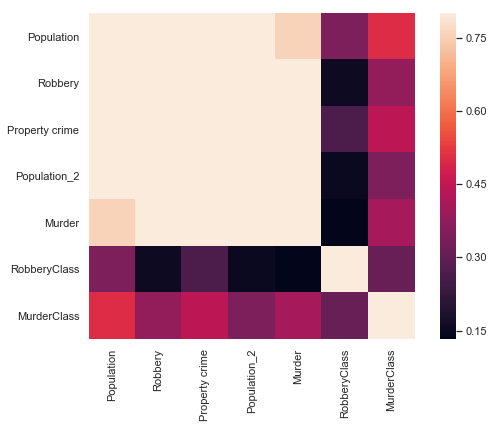

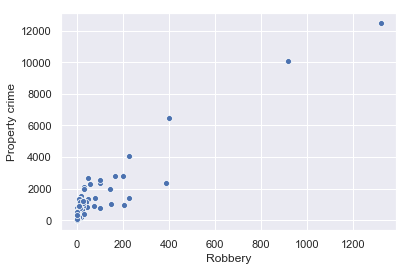

In [63]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

sns.scatterplot(x="Robbery", y="Property crime", data=df)
sns.set(rc={'figure.figsize':(20,8)})
plt.show()

### As given in the task
$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$


In [74]:
# Test your model with different holdout groups.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['RobberyClass','MurderClass', 'Population','Population_2']]
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [75]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
#print(data['Sales'].values)

regr.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
print('\nmean-squared:')
print(mean_squared_error(y_test, y_pred))


Coefficients: 
 [[ 86.74097849 214.88519057   0.01311772   0.00000012]]

Intercept: 
 [-19.67953442]

R-squared:
0.732573111631838

mean-squared:
85466.70055899906


In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=5)

array([0.92115445, 0.73946597, 0.77095108, 0.87326867, 0.31519832])

#### Own feature engineering and selection
1. To get a better R-squared there was "motor vehicle theft" added, which is a property crime
2. Get rid of population squared, because the coefficient is very very tiny and therefore the feature has almost no impact.

In [77]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
#print(data['Sales'].values)
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['RobberyClass','MurderClass', 'Population', 'Motor vehicle theft']]
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
regr.fit(X_train, y_train)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
print('\nmean-squared:')
print(mean_squared_error(y_test, y_pred))


Coefficients: 
 [[111.40606962 134.49274074   0.00902611  11.14978687]]

Intercept: 
 [-6.69988298]

R-squared:
0.838841937092608

mean-squared:
51504.349428814596


In [78]:
print('Less overfitting:')
cross_val_score(regr, X, Y, cv=5)

Less overfitting:


array([0.93676913, 0.75591981, 0.44494925, 0.94835301, 0.82035854])

### With PCA

In [83]:
from sklearn.decomposition import PCA 
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
#print(data['Sales'].values)
Y = df['Property crime'].values.reshape(-1, 1)
X = df[['RobberyClass','MurderClass', 'Population', 'Motor vehicle theft']]

sklearn_pca = PCA(n_components=3)
X_pca = sklearn_pca.fit_transform(X)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=20)



regr.fit(X_train, y_train)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
print('\nmean-squared:')
print(mean_squared_error(y_test, y_pred))
print('\ncoss-val-score:')
cross_val_score(regr, X, Y, cv=5)


Coefficients: 
 [[   0.03364477   10.71942793 -131.84119487]]

Intercept: 
 [385.28769755]

R-squared:
0.8445285705275161

mean-squared:
49686.963750299765

coss-val-score:


array([0.93676913, 0.75591981, 0.44494925, 0.94835301, 0.82035854])